<a href="https://colab.research.google.com/github/VectorSophie/PyEx/blob/main/AICE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [ ]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from datasets import load_dataset

ds = load_dataset("inria-soda/tabular-benchmark", "reg_num_nyc-taxi-green-dec-2016")

df = ds["train"].to_pandas()

print(df.head())


nyc-taxi-green-dec-2016.csv:   0%|          | 0.00/25.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/581835 [00:00<?, ? examples/s]

   passenger_count  tolls_amount  total_amount  lpep_pickup_datetime_day  \
0                1           0.0          6.36                         1   
1                2           0.0          8.50                         1   
2                1           0.0          7.54                         1   
3                1           0.0         12.96                         1   
4                1           0.0         12.30                         1   

   lpep_pickup_datetime_hour  lpep_pickup_datetime_minute  \
0                          0                           52   
1                          0                           10   
2                          0                           12   
3                          0                           29   
4                          0                           42   

   lpep_dropoff_datetime_day  lpep_dropoff_datetime_hour  \
0                          1                           0   
1                          1                           0

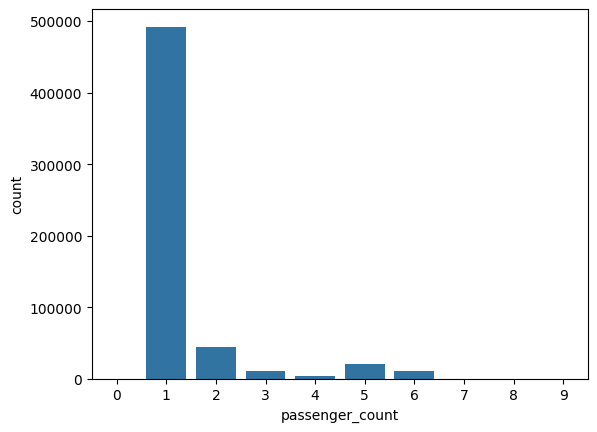

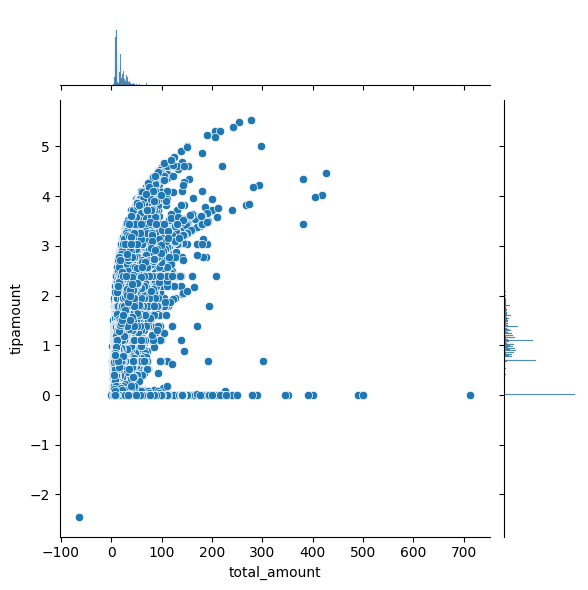

In [34]:
import seaborn as sns

sns.countplot(data = df, x = 'passenger_count')
plt.show()
#탑승인 수 countplot
df = df[df['passenger_count'] != '-']
#탑승인 없는 데이터는 삭제
sns.jointplot(data = df, x = 'total_amount', y = 'tipamount')
plt.show()
#전체 가격과 팁의 jointplot
df_temp = df[df['passenger_count'] < 3]
#우리 데이터는 3인 이하 데이터
df_temp.isna().sum()

cols = df_temp.select_dtypes('int').columns
df_preset = pd.get_dummies(data=df_temp, columns=cols)

In [35]:
from sklearn.model_selection import train_test_split
x = df_preset.drop('tipamount', axis=1)
y = df_preset['total_amount']
X_train, X_valid, y_train, y_valid = train_test_split(x,y, test_size=0.2, random_state=42)

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)

In [37]:
from sklearn.metrics import mean_absolute_error
y_pred = dt.predict(X_valid)
dt_mae = mean_absolute_error(y_valid, y_pred)